In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import joblib
import seaborn as sns
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from keras.models import save_model
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix

2023-07-01 19:19:40.185969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 19:19:40.345929: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanju/ns-allinone-2.35/otcl-1.14:/home/sanju/ns-allinone-2.35/lib
2023-07-01 19:19:40.345952: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-01 19:19:41.363345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

In [2]:
X=[]
y=[]
base_path='dataset1/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data=pd.read_csv(file_path,header=None)
            print(data.shape)
            data=data.to_numpy()
            X.append(data)
            y.append(child)           

dataset1/0/01+39.csv
(30, 63)
dataset1/0/8.csv
(32, 63)
dataset1/0/1-13.csv
(32, 63)
dataset1/0/01+73.csv
(30, 63)
dataset1/0/01-35.csv
(30, 63)
dataset1/0/01-87.csv
(30, 63)
dataset1/0/01+100.csv
(29, 63)
dataset1/0/1-12.csv
(28, 63)
dataset1/0/01+25.csv
(35, 63)
dataset1/0/002-1.csv
(33, 63)
dataset1/0/01+43.csv
(33, 63)
dataset1/0/01+101.csv
(30, 63)
dataset1/0/5.csv
(32, 63)
dataset1/0/4-4.csv
(35, 63)
dataset1/0/1-3.csv
(28, 63)
dataset1/0/2-2.csv
(30, 63)
dataset1/0/1-4.csv
(35, 63)
dataset1/0/002-17.csv
(33, 63)
dataset1/0/01+94.csv
(30, 63)
dataset1/0/01+155.csv
(36, 63)
dataset1/0/01+42.csv
(30, 63)
dataset1/0/002-5.csv
(32, 63)
dataset1/0/01+169.csv
(32, 63)
dataset1/0/13.csv
(32, 63)
dataset1/0/2+5.csv
(32, 63)
dataset1/0/01+131.csv
(32, 63)
dataset1/0/01-97.csv
(30, 63)
dataset1/0/3+17.csv
(33, 63)
dataset1/0/001+11.csv
(36, 63)
dataset1/0/01+97.csv
(32, 63)
dataset1/0/14.csv
(31, 63)
dataset1/0/002-6.csv
(30, 63)
dataset1/0/01+5.csv
(35, 63)
dataset1/0/01+128.csv
(32, 63)


(30, 63)
dataset1/0/01+68.csv
(32, 63)
dataset1/0/002-8.csv
(32, 63)
dataset1/0/001+5.csv
(32, 63)
dataset1/0/01+145.csv
(33, 63)
dataset1/0/002-4.csv
(35, 63)
dataset1/0/002-13.csv
(32, 63)
dataset1/0/01+148.csv
(35, 63)
dataset1/0/01-77.csv
(31, 63)
dataset1/0/01+151.csv
(33, 63)
dataset1/0/01-78.csv
(30, 63)
dataset1/0/01+58.csv
(32, 63)
dataset1/0/01+157.csv
(32, 63)
dataset1/0/01+88.csv
(28, 63)
dataset1/0/01+26.csv
(32, 63)
dataset1/0/01-19.csv
(42, 63)
dataset1/0/01+107.csv
(32, 63)
dataset1/0/01+143.csv
(42, 63)
dataset1/0/4-12.csv
(28, 63)
dataset1/0/001+19.csv
(30, 63)
dataset1/0/01-42.csv
(30, 63)
dataset1/0/4-13.csv
(32, 63)
dataset1/0/01+160.csv
(30, 63)
dataset1/0/01+130.csv
(33, 63)
dataset1/0/01+121.csv
(42, 63)
dataset1/0/01-99.csv
(30, 63)
dataset1/0/002-16.csv
(30, 63)
dataset1/0/01-79.csv
(33, 63)
dataset1/0/002+2.csv
(30, 63)
dataset1/0/01-90.csv
(31, 63)
dataset1/0/01+63.csv
(36, 63)
dataset1/0/2-8.csv
(32, 63)
dataset1/0/01+180.csv
(30, 63)
dataset1/0/01+70.csv
(

(48, 63)
dataset1/1/002+121.csv
(42, 63)
dataset1/1/002+15.csv
(40, 63)
dataset1/1/001+81.csv
(45, 63)
dataset1/1/001+39.csv
(46, 63)
dataset1/1/002+11.csv
(38, 63)
dataset1/1/002+14.csv
(39, 63)
dataset1/1/001+80.csv
(46, 63)
dataset1/1/001+92.csv
(50, 63)
dataset1/1/001+51.csv
(37, 63)
dataset1/1/002+148.csv
(46, 63)
dataset1/1/00-8.csv
(39, 63)
dataset1/1/002+213.csv
(43, 63)
dataset1/1/47.csv
(52, 63)
dataset1/1/001+31.csv
(43, 63)
dataset1/1/002+202.csv
(50, 63)
dataset1/1/001+49.csv
(37, 63)
dataset1/1/002+116.csv
(46, 63)
dataset1/1/3.csv
(42, 63)
dataset1/1/002+160.csv
(37, 63)
dataset1/1/001+7.csv
(43, 63)
dataset1/1/00-1.csv
(38, 63)
dataset1/1/001+1.csv
(38, 63)
dataset1/1/001+69.csv
(53, 63)
dataset1/1/002+197.csv
(34, 63)
dataset1/1/002+77.csv
(45, 63)
dataset1/1/001+35.csv
(43, 63)
dataset1/1/001-2.csv
(36, 63)
dataset1/1/001+60.csv
(51, 63)
dataset1/1/002+174.csv
(52, 63)
dataset1/1/002-10.csv
(46, 63)
dataset1/1/002+170.csv
(51, 63)
dataset1/1/002+3.csv
(38, 63)
dataset

(54, 63)
dataset1/1/001+10.csv
(46, 63)
dataset1/1/002+206.csv
(52, 63)
dataset1/1/002+32.csv
(47, 63)
dataset1/1/002+136.csv
(48, 63)
dataset1/1/16.csv
(48, 63)
dataset1/1/002+155.csv
(54, 63)
dataset1/1/002+200.csv
(53, 63)
dataset1/1/25.csv
(43, 63)
dataset1/1/0001-2.csv
(36, 63)
dataset1/1/001-4.csv
(39, 63)
dataset1/1/001+45.csv
(54, 63)
dataset1/1/no-3.csv
(38, 63)
dataset1/1/00-3.csv
(38, 63)
dataset1/1/81.csv
(45, 63)
dataset1/1/002+187.csv
(48, 63)
dataset1/1/2.csv
(42, 63)
dataset1/1/002+78.csv
(45, 63)
dataset1/1/001+63.csv
(53, 63)
dataset1/1/001+67.csv
(45, 63)
dataset1/1/004-3.csv
(38, 63)
dataset1/1/15.csv
(47, 63)
dataset1/1/53.csv
(51, 63)
dataset1/1/0001-17.csv
(43, 63)
dataset1/1/002+42.csv
(43, 63)
dataset1/1/35.csv
(46, 63)
dataset1/1/002+23.csv
(42, 63)
dataset1/1/0001-3.csv
(38, 63)
dataset1/1/67.csv
(49, 63)
dataset1/1/002+125.csv
(52, 63)
dataset1/1/57.csv
(52, 63)
dataset1/1/001+72.csv
(46, 63)
dataset1/1/002+168.csv
(40, 63)
dataset1/1/004-6.csv
(40, 63)
data

In [3]:
y = np.array(y)

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
max_review_length = 50
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [6]:
X_train = X_train.reshape(-1, 50* 63)
X_test = X_test.reshape(-1, 50* 63)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
joblib.dump(scaler, 'scalersvm.pkl')

['scalersvm.pkl']

In [9]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [10]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [11]:
# Create an SVM model
svm_model = SVC()

In [12]:
# Train the SVM model
history=svm_model.fit(X_train, y_train)

/home/sanju/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


In [15]:
cm = confusion_matrix(y_test,y_pred)

Confusion Matrix:
[[140  10]
 [  8 142]]


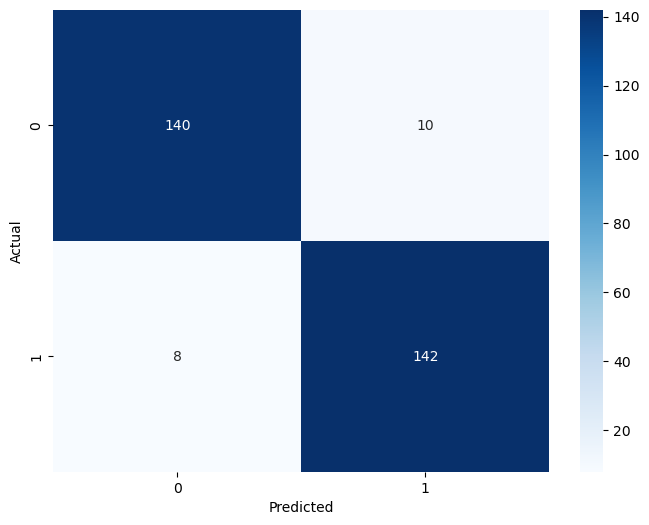

In [16]:
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [18]:
fpr1, tpr1, thresholds_keras = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive rate')

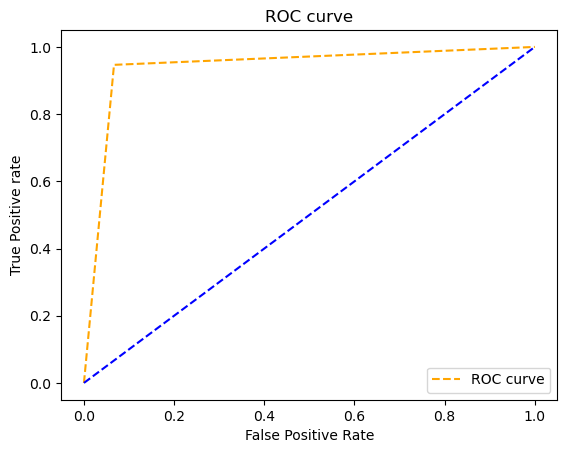

In [19]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')

In [20]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

0.9400000000000001


In [21]:
y_pred = svm_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

In [22]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.934


In [23]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.947


In [24]:
print(matthews_corrcoef(y_test, y_pred))

0.8800782326533972
